# Introduction 

In the following notebook, I will preparing the 2020_0505_Cleaned_Weather_Features.csv for forecasting temperature in Spain

* Raw data can be found [here](https://github.com/KishenSharma6/Weather-Energy-Consumption-in-Spain/tree/master/Data/01_Raw_Data)
* Cleaned data can be found [here](https://github.com/KishenSharma6/Weather-Energy-Consumption-in-Spain/tree/master/Data/02_Cleaned_Data)

**Read in libraries for notebook**

In [118]:
import numpy as np
import pandas as pd
from IPython.display import Image

import matplotlib.pyplot as plt
import warnings

**Set notebook preferences**

In [119]:
#Set preferences for pandas 
pd.set_option("display.max_rows", 101)

#Set style for visualizations
plt.style.use('Solarize_Light2')

#Font dictionary for plot titles and labels
font_title = {'fontsize' : 24, 
              'style':'italic',
              'fontweight' : 'semibold',
             'fontname':'Gill Sans MT'}

font_label = {'fontsize' : 16, 
              'style':'italic',
              'fontweight' : 'semibold',
             'fontname':'Gill Sans MT'}

#Set path to save visualizations
viz_path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Spain Hourly Energy Demand and Weather\Visualizations\Data_Processing\Temperature_Data'

#Surpress warnings
warnings.filterwarnings('ignore')

**Read in data**

In [120]:
#Set path to raw data
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Spain Hourly Energy Demand and Weather'

#Read in raw data
df = pd.read_csv(path + '/Data/02_Cleaned_Data/2020_0514_Weather_Energy.csv', parse_dates=['date_time'], index_col='date_time')

#Drop columns not pertaining to temp
df =df[['temp']]

# Data Overview

**Data Dictionary**

* **date_time**: Datetime index localized to CET
* **temp**: hourly temperature(F) in Spain

**Data Preview**

In [121]:
#Print df shape
print('Shape of data:', df.shape)

#View head
display(df.head())

Shape of data: (35072, 1)


,temp
date_time,
2015-01-01 00:00:00,30.814633
2015-01-01 01:00:00,30.852860
2015-01-01 02:00:00,30.108448
2015-01-01 03:00:00,30.091044
2015-01-01 04:00:00,30.192620


**About the data**

In [122]:
print('Data set stats and info:\n{}\n'.format(df.describe()))
print(df.info())

Data set stats and info:
               temp
count  35072.000000
mean      61.752442
std       13.069191
min       29.825352
25%       51.638000
50%       60.573200
75%       71.479400
max       97.008800

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35072 entries, 2015-01-01 00:00:00 to 2018-12-31 23:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   temp    35072 non-null  float64
dtypes: float64(1)
memory usage: 548.0 KB
None


# Quick EDA

**Raw Timeplot**

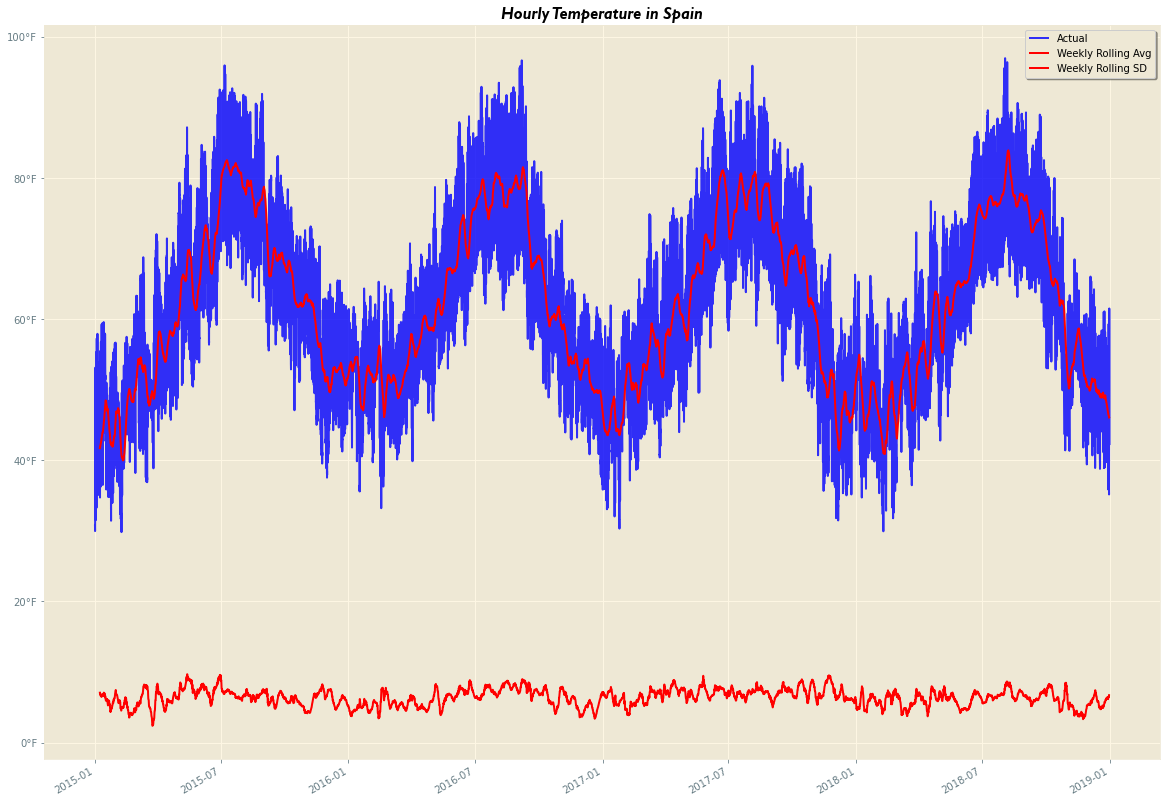

In [123]:
#Set path to visuals
eda_path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Spain Hourly Energy Demand and Weather\Visualizations\Exploratory_Data_Analysis\Temperature'

#Raw data plot
Image(filename = eda_path + "/Hourly_Temp.png", width=1000, height=500,unconfined=True)

**Autocorrelation plots**

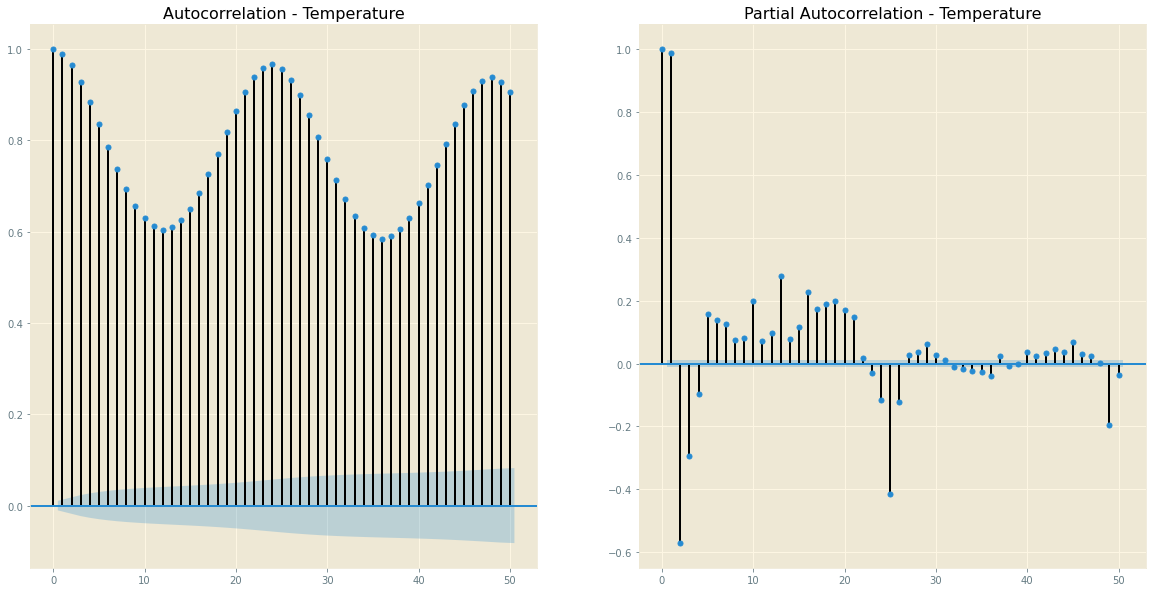

In [124]:
#Raw data ACF and PACF PLot
Image(filename = eda_path+ "/ACF_PACF_Raw_Temp.png", width=800, height=500,unconfined=True)

**Decomposition Model**

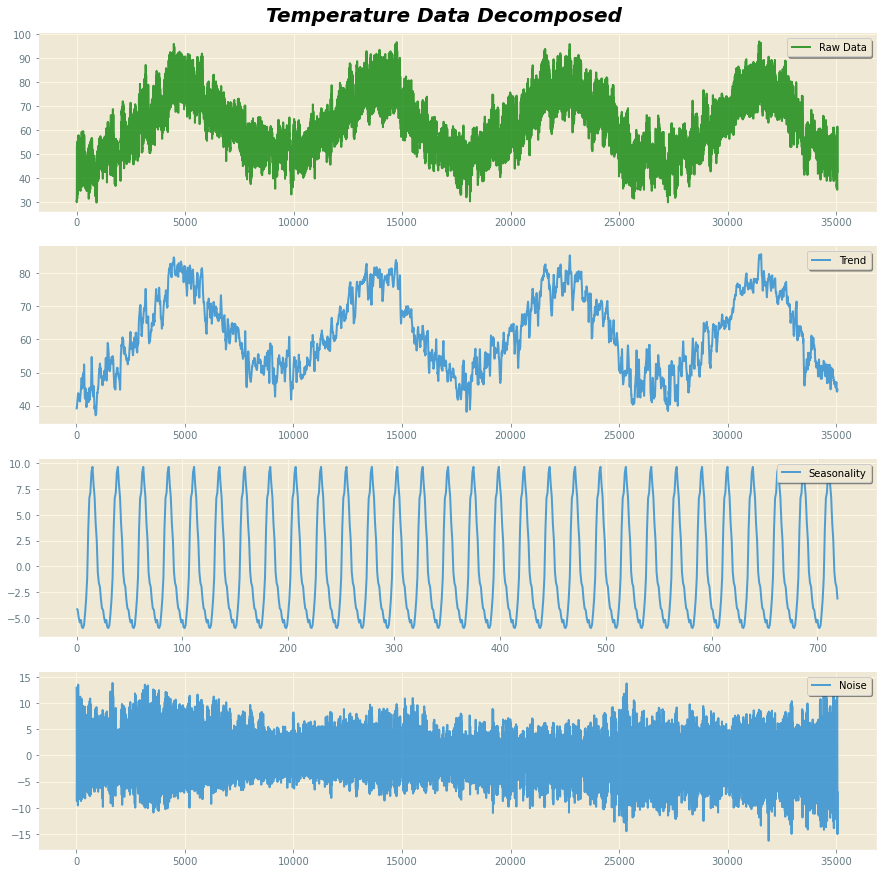

In [125]:
#Raw data Decomposition
Image(filename = eda_path + "/Hourly_Temp_Decomposed.png", width=800, height=500,unconfined=True)

# Preprocessing

### Stationarize Data

In [126]:
#Apply differencing to temp to deseason 
df['temp_deseasoned1'] = df['temp'].diff(24)

#Drop rows with missing values
df.dropna(inplace=True)

#Check
display(df.head())

,temp,temp_deseasoned1
date_time,,
2015-01-02 00:00:00,33.940636,3.126004
2015-01-02 01:00:00,33.590660,2.737800
2015-01-02 02:00:00,32.796804,2.688356
2015-01-02 03:00:00,32.554996,2.463952
2015-01-02 04:00:00,32.566640,2.374020


**Visualize deseasoned data**

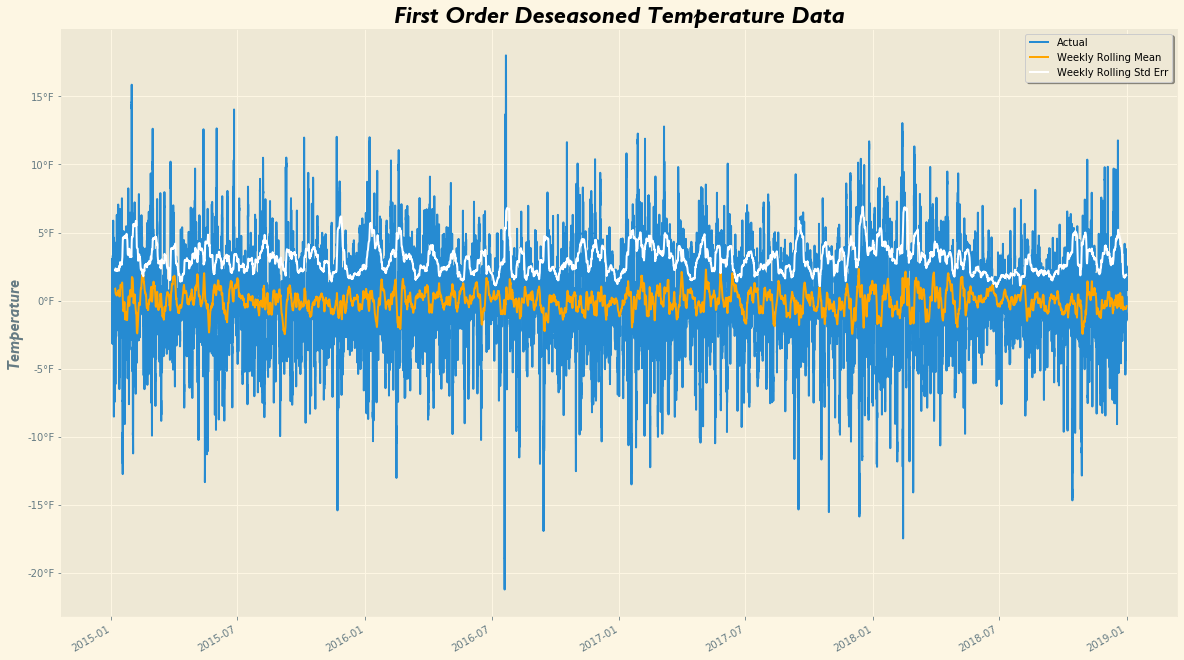

In [127]:
#Import timeseries_plot
from TimeseriesPlotter import timeseries_plot

###visualize residuals
f, ax = plt.subplots(figsize = (20,12))

#Plot deseasoned data 
timeseries_plot(df.temp_deseasoned1, ax = ax)
timeseries_plot(df.temp_deseasoned1.rolling(24*7,24*4).mean(),
                color = 'orange',ax = ax)#7 days

timeseries_plot(df.temp_deseasoned1.rolling(24*7,24*4).std(),
                title= 'First Order Deseasoned Temperature Data',title_dict=font_title,
                ylabel='Temperature', label_dict=font_label,
                 color = 'w',ax = ax)#7 days
###Set plot aesthetics###
#Axes
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:}°F".format(int(x))))

#Legend
ax.legend(['Actual', 'Weekly Rolling Mean', 'Weekly Rolling Std Err'], 
            fancybox = True, shadow = True, frameon = True)

##Save fig##
plt.savefig(viz_path + '/Temp_Deseasoned.png',bbox_inches='tight')

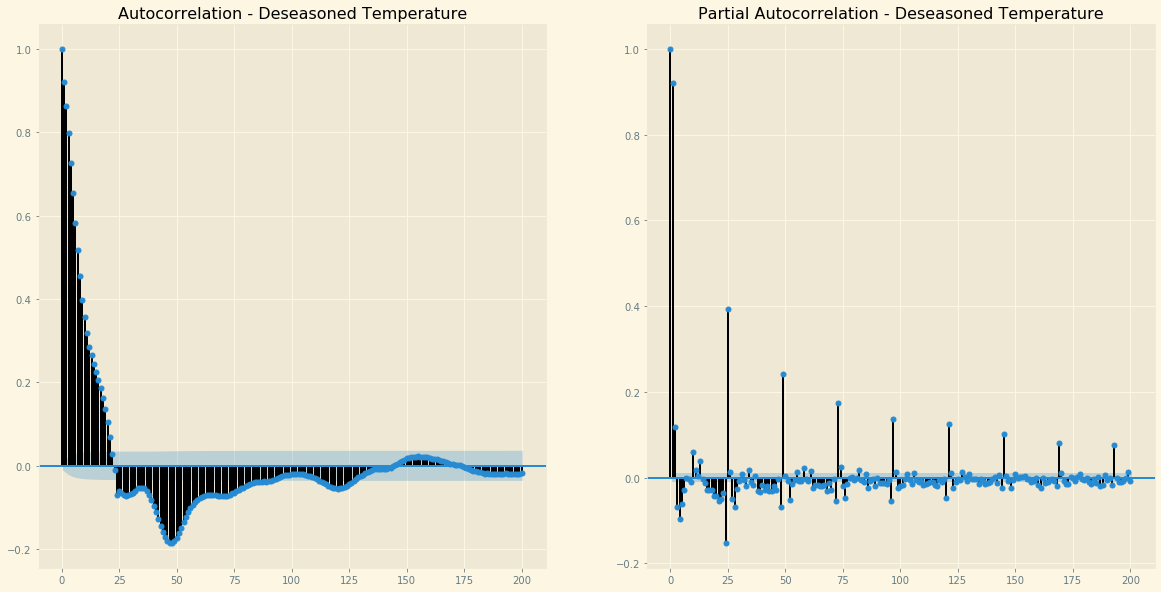

In [128]:
#Import plot_acf and plot_pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#Set plot
f, ax = plt.subplots(1,2,figsize = (20,10))

#Fit to data
plot_acf(df.temp_deseasoned1, lags = 200, ax = ax[0], title ='Autocorrelation - Deseasoned Temperature')
plot_pacf(df.temp_deseasoned1, lags = 200, ax = ax[1], title='Partial Autocorrelation - Deseasoned Temperature');

##Save fig##
plt.savefig(viz_path + '/ACF_PACF_Temp_Deseasoned.png',bbox_inches='tight')

### Test deseasoned temperature data for stationarity

In [129]:
#Import StationarityTests
from StationarityTests import ADF_KPSS_test, mean_var_test

#Test deseasoned temp
ADF_KPSS_test(df.temp_deseasoned1, 24)

ADF Statistic: -26.414159017760404
P-Value: 0.0
Critical Values 1% : -3.4305
Critical Values 5% : -2.8616
Critical Values 10% : -2.5668
KPSS Statistic: 0.052534277609344586
P-Value: 0.1
Critical Values 10% : 0.347
Critical Values 5% : 0.463
Critical Values 2.5% : 0.574
Critical Values 1% : 0.739


In [130]:
#View metrics variance and mean stats
mean_var_test(df.temp_deseasoned1,24)

Mean1: 0.0028122042742119054
Mean2: 0.003550285518501634
Var1: 10.273790342285798
Var2: 11.30616577952727


# Write CSV's

**Split data into train and test sets**

In [131]:
#Set split point to capture 80% of data for training
split = round(len(df) * .8)

#Assign 80% of data to temp_train and 20% to temp_test
temp_train = df[:split]
temp_test = df[split:]

#Check 
print('Training data shape: ',temp_train.shape)
print('Test data shape: ',temp_test.shape)

Training data shape:  (28038, 2)
Test data shape:  (7010, 2)


**Write files to CSV**

In [132]:
#Write temp_train and temp_test to files
temp_train.to_csv(path + '/Data/03_Processed_Data/2020_0515_temp_train.csv')
temp_test.to_csv(path + '/Data/03_Processed_Data/2020_0515_temp_test.csv')